In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("../input/diabetes.csv")
X = data.iloc[:,0:8] 
y = data.iloc[:,-1]   
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  
print(featureScores.nlargest(8,'Score'))  

                   Features        Score
4                   Insulin  2463.495577
1                   Glucose  1269.419806
7                       Age   150.231502
5                       BMI   131.793616
0               Pregnancies   107.366277
3             SkinThickness    65.279005
2             BloodPressure    14.078130
6  DiabetesPedigreeFunction     4.945461


[0.0814057  0.25288824 0.08650099 0.06820849 0.0743113  0.16763383
 0.12527045 0.143781  ]


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


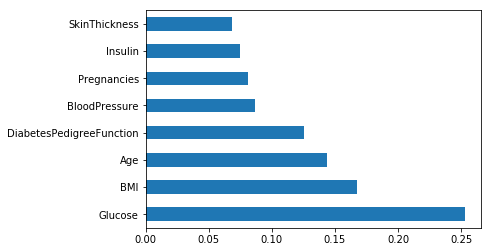

In [6]:
import pandas as pd
import numpy as np
data = pd.read_csv("../input/diabetes.csv")
X = data.iloc[:,0:8] 
y = data.iloc[:,-1]   
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
model = RandomForestClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

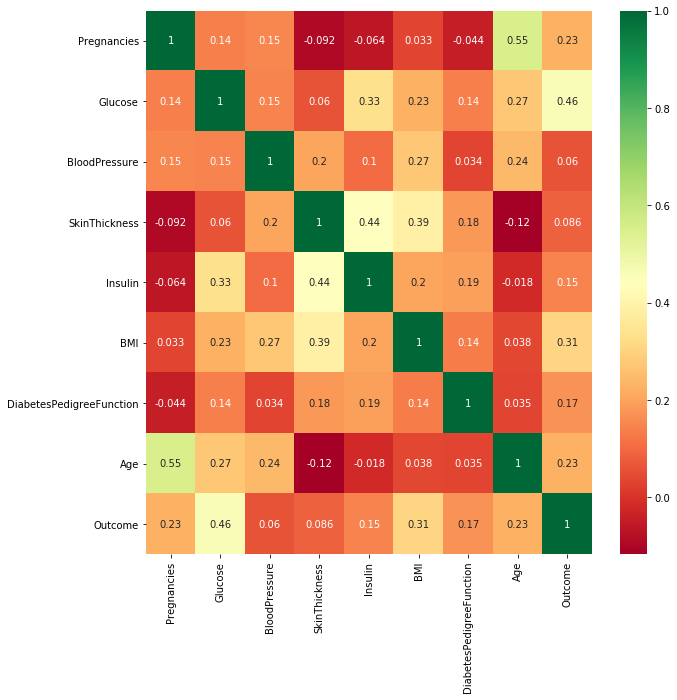

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv("../input/diabetes.csv")
X = data.iloc[:,0:8]  
y = data.iloc[:,-1]   
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")